# Universidad Autónoma de Yucatán

## Facultad de Matemáticas

### Machine Learning

**Teacher:** Dr. Victor Uc Cetina

**Student:** Dayan Bravo Fraga

# Ada Boost

## Download Corpus from GitHub (only for Colab)

In [ ]:
import sys
import os

in_colab: bool = 'google.colab' in sys.modules
if in_colab:
    print('Is running in Colab')
    if not os.path.isdir('machine_learning'):
        print("Downloading project")
        get_ipython().system('git clone https://github.com/dayan3847/machine_learning')
        sys.path.insert(0, './machine_learning/')
    else:
        get_ipython().system('git -C ./machine_learning fetch')
        get_ipython().system('git -C ./machine_learning rebase')
    if not os.path.isdir('data'):
        print('Copying data folder')
        get_ipython().system('cp -r ./machine_learning/dayan3847/ada_boost/data ./')
else:
    print('Is not running in Colab')

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# My libraries
from dayan3847.ada_boost.src.AdaBoost import AdaBoost
from dayan3847.ada_boost.src.WeakClassifier import WeakClassifier
from dayan3847.ada_boost.src.Plotter import Plotter

## Import Data

In [2]:
the_data = np.loadtxt('./data/dataCircle_fix.txt', delimiter=' ')
the_data

array([[ 0.     ,  0.     ,  1.     ],
       [-3.70962, -5.3521 ,  1.     ],
       [-1.42211, -2.40219,  1.     ],
       [-2.66972,  4.30397,  1.     ],
       [ 1.55548,  4.9359 ,  1.     ],
       [-1.59524,  6.23187,  1.     ],
       [-5.55343, -1.67754,  1.     ],
       [-5.57887, -0.37315,  1.     ],
       [ 2.91409,  4.75527,  1.     ],
       [-1.92258, -5.99233,  1.     ],
       [ 4.57485,  4.59031,  1.     ],
       [ 5.32024, -0.0782 ,  1.     ],
       [ 1.98235, -1.70504,  1.     ],
       [-1.67116,  2.00863,  1.     ],
       [ 2.39138,  0.11597,  1.     ],
       [-0.03928, -2.43152,  1.     ],
       [ 1.29275, -1.86318,  1.     ],
       [ 0.01739,  0.86042,  1.     ],
       [-0.14444, -4.24898,  1.     ],
       [ 6.38276,  1.80984,  1.     ],
       [ 2.33197, -4.20321,  1.     ],
       [-6.6919 ,  1.80744,  1.     ],
       [-2.67265, -0.99825,  1.     ],
       [-5.1902 , -2.51251,  1.     ],
       [ 5.7403 , -0.70631,  1.     ],
       [ 2.73013, -3.5438

## Transpose Data

In [3]:
the_data_t = the_data.T
the_data_t

array([[ 0.     , -3.70962, -1.42211, -2.66972,  1.55548, -1.59524,
        -5.55343, -5.57887,  2.91409, -1.92258,  4.57485,  5.32024,
         1.98235, -1.67116,  2.39138, -0.03928,  1.29275,  0.01739,
        -0.14444,  6.38276,  2.33197, -6.6919 , -2.67265, -5.1902 ,
         5.7403 ,  2.73013, -4.75332,  2.0199 ,  2.07486, -5.04006,
        -1.5867 ,  0.25811,  3.82225,  3.46025,  2.71912,  4.68591,
        -0.82815, -2.3974 ,  3.45853, -1.41428,  6.     , -6.84527,
        -6.19062,  4.88147, -8.72957,  7.43674,  8.98549,  8.85766,
         9.96122,  9.96828,  8.60504, -8.34754, -6.84408,  8.89943,
        -4.82195, -7.65412,  5.85241, -5.86623,  7.67761,  7.61185,
         9.99208, -3.24407, -8.19462,  8.25193,  1.25512, -3.9189 ,
        -3.32719, -8.10487, -0.42222, -5.93936,  9.83218, -6.16813,
        -8.72171,  2.28106,  8.89075, -9.76748,  8.67909,  4.37574,
         5.92641,  1.99628, -6.91256, -8.07426,  5.97567, -9.79845,
         0.95351,  1.78681,  9.5045 ,  7.97529, 

In [ ]:
## Create Ada Boost Controller

In [7]:
ada_boost = AdaBoost(the_data_t)
ada_boost.data

array([[ 0.     , -3.70962, -1.42211, -2.66972,  1.55548, -1.59524,
        -5.55343, -5.57887,  2.91409, -1.92258,  4.57485,  5.32024,
         1.98235, -1.67116,  2.39138, -0.03928,  1.29275,  0.01739,
        -0.14444,  6.38276,  2.33197, -6.6919 , -2.67265, -5.1902 ,
         5.7403 ,  2.73013, -4.75332,  2.0199 ,  2.07486, -5.04006,
        -1.5867 ,  0.25811,  3.82225,  3.46025,  2.71912,  4.68591,
        -0.82815, -2.3974 ,  3.45853, -1.41428,  6.     , -6.84527,
        -6.19062,  4.88147, -8.72957,  7.43674,  8.98549,  8.85766,
         9.96122,  9.96828,  8.60504, -8.34754, -6.84408,  8.89943,
        -4.82195, -7.65412,  5.85241, -5.86623,  7.67761,  7.61185,
         9.99208, -3.24407, -8.19462,  8.25193,  1.25512, -3.9189 ,
        -3.32719, -8.10487, -0.42222, -5.93936,  9.83218, -6.16813,
        -8.72171,  2.28106,  8.89075, -9.76748,  8.67909,  4.37574,
         5.92641,  1.99628, -6.91256, -8.07426,  5.97567, -9.79845,
         0.95351,  1.78681,  9.5045 ,  7.97529, 

## Data Count

In [9]:
ada_boost.data_count

102

## Add Weight Column

In [10]:
ada_boost.add_weight_row()

array([[ 0.00000000e+00, -3.70962000e+00, -1.42211000e+00,
        -2.66972000e+00,  1.55548000e+00, -1.59524000e+00,
        -5.55343000e+00, -5.57887000e+00,  2.91409000e+00,
        -1.92258000e+00,  4.57485000e+00,  5.32024000e+00,
         1.98235000e+00, -1.67116000e+00,  2.39138000e+00,
        -3.92800000e-02,  1.29275000e+00,  1.73900000e-02,
        -1.44440000e-01,  6.38276000e+00,  2.33197000e+00,
        -6.69190000e+00, -2.67265000e+00, -5.19020000e+00,
         5.74030000e+00,  2.73013000e+00, -4.75332000e+00,
         2.01990000e+00,  2.07486000e+00, -5.04006000e+00,
        -1.58670000e+00,  2.58110000e-01,  3.82225000e+00,
         3.46025000e+00,  2.71912000e+00,  4.68591000e+00,
        -8.28150000e-01, -2.39740000e+00,  3.45853000e+00,
        -1.41428000e+00,  6.00000000e+00, -6.84527000e+00,
        -6.19062000e+00,  4.88147000e+00, -8.72957000e+00,
         7.43674000e+00,  8.98549000e+00,  8.85766000e+00,
         9.96122000e+00,  9.96828000e+00,  8.60504000e+0

## Plot Data Points

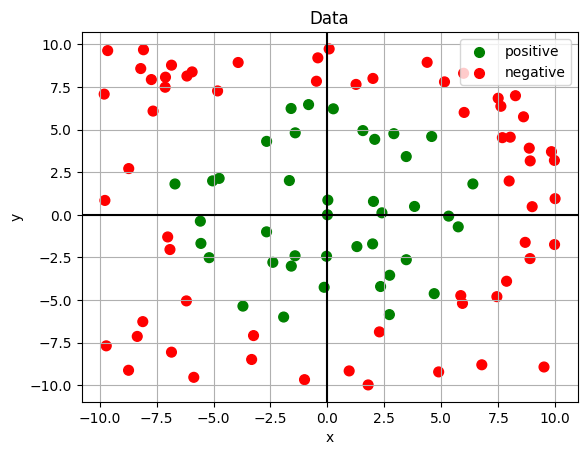

In [11]:
plotter: Plotter = Plotter(False)
plotter.plot_data(ada_boost.data)
plotter.show()

## Normalize Data

In [12]:
ada_boost.normalize_data()

array([[ 4.95108014e+01,  3.07663817e+01,  4.23249908e+01,
         3.60209151e+01,  5.73705201e+01,  4.14501784e+01,
         2.14497540e+01,  2.13212077e+01,  6.42354702e+01,
         3.97961550e+01,  7.26271606e+01,  7.63935579e+01,
         5.95274609e+01,  4.10665606e+01,  6.15942575e+01,
         4.93123226e+01,  5.60429660e+01,  4.95986717e+01,
         4.87809574e+01,  8.17623884e+01,  6.12940634e+01,
         1.56971541e+01,  3.60061100e+01,  2.32851268e+01,
         7.85160883e+01,  6.33059347e+01,  2.54926472e+01,
         5.97171981e+01,  5.99949067e+01,  2.40437725e+01,
         4.14933304e+01,  5.08150110e+01,  6.88243316e+01,
         6.69951740e+01,  6.32503020e+01,  7.31883381e+01,
         4.53262242e+01,  3.73969267e+01,  6.69864829e+01,
         4.23645552e+01,  7.98283320e+01,  1.49221875e+01,
         1.82300828e+01,  7.41764874e+01,  5.40096703e+00,
         8.70880669e+01,  9.49137795e+01,  9.42678645e+01,
         9.98440668e+01,  9.98797405e+01,  9.29913954e+0

## Plot Normalized Data Points

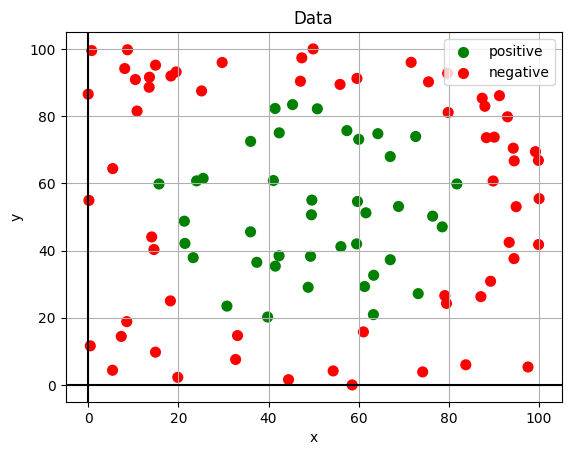

In [13]:
plotter.plot_data(ada_boost.data)
plotter.show()

## Add First Classifier

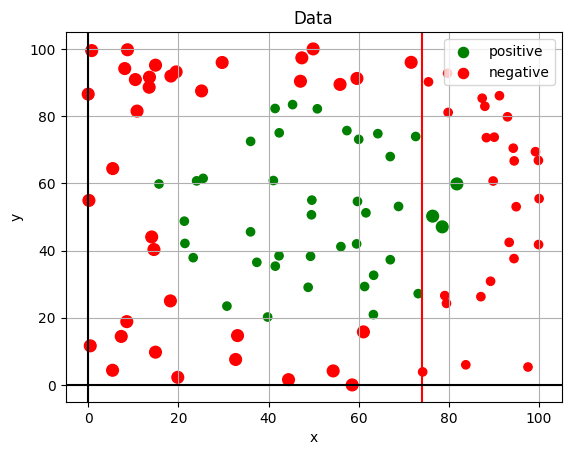

In [14]:
ada_boost.add_classifier(True)

## Add Second Classifier

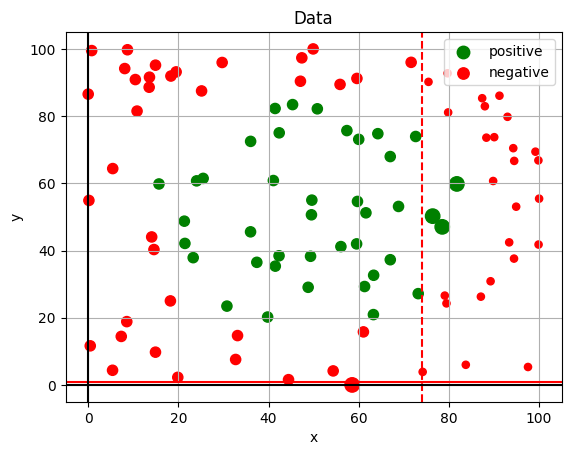

In [15]:
ada_boost.add_classifier(True)

## Add 100 Classifiers

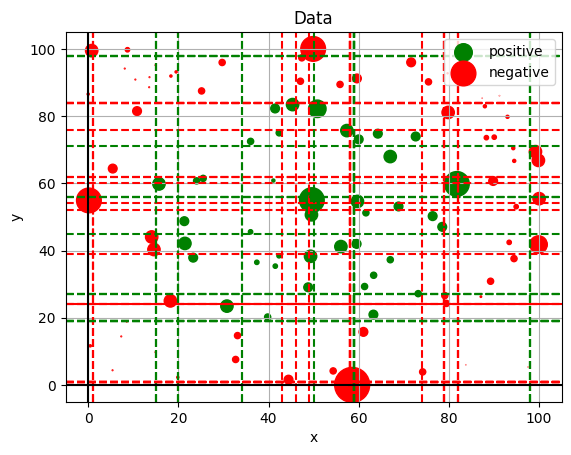

In [16]:
ada_boost.add_classifier_loop(97)
ada_boost.add_classifier(True)

## Accuracy History

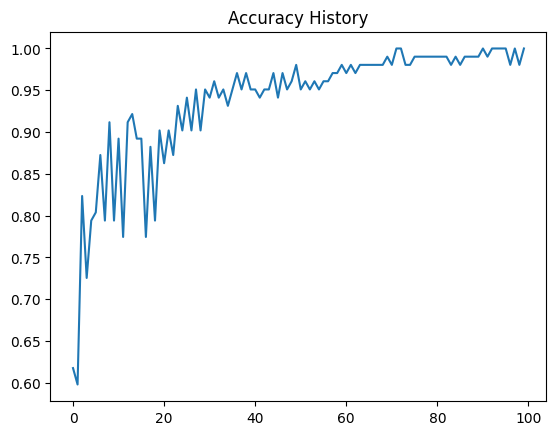

In [17]:
plt.clf()
plt.title('Accuracy History')
plt.plot(ada_boost.accuracy_history)
plt.show()